In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
output_path = "/content/gdrive/My Drive/Colab Notebooks/Project_3_NN/cars_train"

Mounted at /content/gdrive


# Project 3 : Neural Network Using Fast.AI
By Aravind Raju


# Introduction
 Classifying Old vs. New Cars with Fast.ai .


 In this project, i aim to build and deploy a basic Neural Network using fast.ai to differentiate between old and new cars
 This project has two main parts
 1. Building the model
 2. Deploying the model on huggingface space
    


In [ ]:
#Importing Libraries

In [ ]:
import os
import requests
import time
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from fastcore.all import *
from duckduckgo_search import DDGS
import matplotlib.pyplot as plt
from fastai.vision.all import *

In [ ]:
#setting the directory of the training data (images)
PATH_SET=output_path

In [ ]:
#Creating a function to that gets image urls based on the search term
def search_images(term, max_images=200):
     return DDGS().images(keywords=term, max_results=max_images)

In [ ]:
#function for store all the urls in a list
def geturls(text,count=20):
    dict=DDGS().images(keywords=text, max_results=count)
    urls = []
    for i in dict:
        urls.append(i['image'])
    return urls


In [ ]:
#getting images urls for new cars
url1=geturls('new car')

.    Proactor event loop does not implement add_reader family of methods required.
    Registering an additional selector thread for add_reader support.
    To avoid this warning use:
        asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())
    
  warnings.warn(PROACTOR_WARNING, RuntimeWarning)


In [ ]:
#getting image urls for old cars
url2=geturls('very old car')

In [ ]:
#defining  a funcion to download the images into the directory mentioned earlier in PATH_SET variable
def download_images(image_urls, subfolder_name):
    # Create the folder if it doesn't exist
    folder_path = os.path.join(output_path, subfolder_name)
    os.makedirs(folder_path, exist_ok=True)

    # Download and save images
    for i, url in enumerate(image_urls):
        time.sleep(5)
        try:
            response = requests.get(url)
            if response.status_code == 200:
                with open(os.path.join(folder_path, f"image_{i}.jpg"), 'wb') as f:
                    f.write(response.content)
                print(f"Downloaded image {i+1}/{len(image_urls)}")
            else:
                print(f"Failed to download image {i+1}/{len(image_urls)} - Status code: {response.status_code}")
        except Exception as e:
            print(f"Failed to download image {i+1}/{len(image_urls)} - Error: {str(e)}")



In [ ]:
#downloading the images for the new cars
download_images(url1,'new_cars')


Downloaded image 1/20
Downloaded image 2/20
Downloaded image 3/20
Downloaded image 4/20
Downloaded image 5/20
Downloaded image 6/20
Downloaded image 7/20
Downloaded image 8/20
Downloaded image 9/20
Downloaded image 10/20
Downloaded image 11/20
Downloaded image 12/20
Downloaded image 13/20
Downloaded image 14/20
Downloaded image 15/20
Downloaded image 16/20
Downloaded image 17/20
Downloaded image 18/20
Downloaded image 19/20
Downloaded image 20/20


In [ ]:
#downloading images of old cars
download_images(url2, 'old_cars')

.  warnings.warn("Curlm alread closed! quitting from process_data")


Downloaded image 1/20
Downloaded image 2/20
Downloaded image 3/20
Downloaded image 4/20
Downloaded image 5/20
Downloaded image 6/20
Downloaded image 7/20
Downloaded image 8/20
Downloaded image 9/20
Downloaded image 10/20
Downloaded image 11/20
Downloaded image 12/20
Downloaded image 13/20
Downloaded image 14/20
Downloaded image 15/20
Downloaded image 16/20
Downloaded image 17/20
Downloaded image 18/20
Downloaded image 19/20
Downloaded image 20/20


In [ ]:
DATASET_PATH=output_path

In [ ]:
#creating a labels.csv
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [ ]:
class_names


['new_cars', 'old_cars']

In [ ]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path= f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)


In [ ]:
df=pd.DataFrame({'name':image_paths,
                'labels':labels})

In [ ]:
df.to_csv(path_or_buf=f'{DATASET_PATH}/labels.csv', index=False)

In [ ]:
#creating batches using imageDataloaders
dls=ImageDataLoaders.from_folder(path=DATASET_PATH,
                                item_tfms=Resize(1000),
                                bs=16,
                                batch_tfms=[Normalize.from_stats(*imagenet_stats),RandTransform()],
                                valid_pct=0.2
                                )

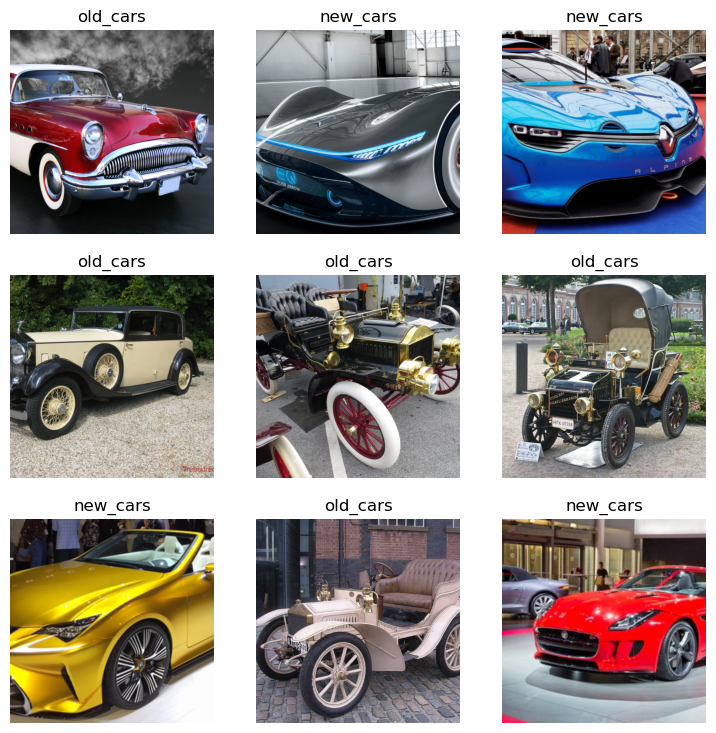

In [ ]:
dls.show_batch()

In [ ]:
#training the model
model = vision_learner(dls=dls,arch=models.resnet18,metrics=[accuracy,error_rate])

In [ ]:
#fine tuning it
model.fine_tune(epochs=1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.245487,0.308426,0.875000,0.125000,00:30


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.436618,0.439173,0.875000,0.125000,00:41


In [ ]:
#error rate is low accuracy is high

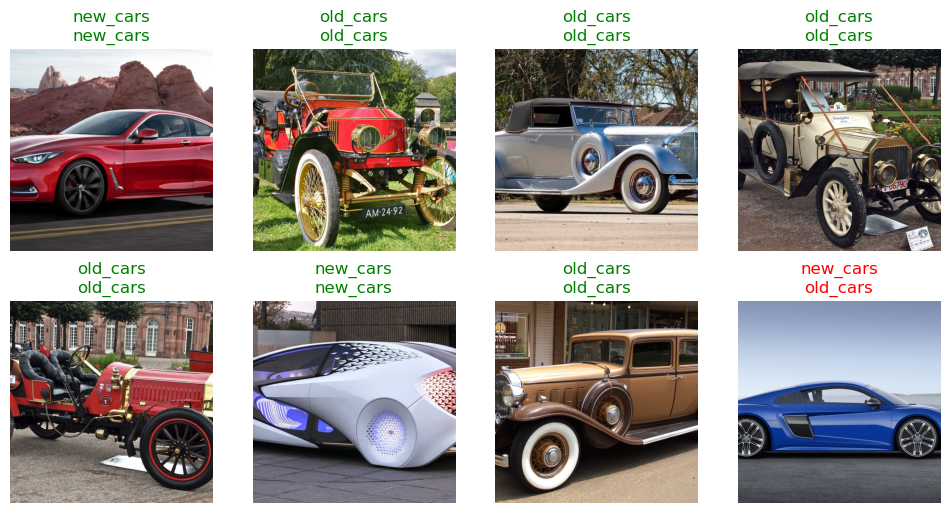

In [ ]:
#some of the predictions
model.show_results()

In [ ]:
#the model is able to predict it great accuracy

In [ ]:
#model Exporting
#for deployment in hugging space

In [ ]:

target_path = "/content/gdrive/My Drive/Colab Notebooks/Project_3_NN/model"

model.export(target_path)


In [ ]:
#getting a requirements text so that it will work seamlessly on the Huggingspace platform
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


# Deployed model

### Link to the Deployed model is provided
https://huggingface.co/spaces/grover101/NeuralNet